In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from PIL import Image
import math

#following code is to create line graph from spreadsheet made with "df_genedensity_each_segment.ipynb"

In [2]:
inputdir="C:\\Users\\sunad\\Desktop\\exp210919_cantas\\tissue_segmentation_220305\\segmentation\\96h\\for_graph"
outputdir1 = f"{inputdir}\\output\\graphs1"
outputdir2 = f"{inputdir}\\output\\graphs2"
outputdir3 = f"{inputdir}\\output\\graphs3"
outputdir4 = f"{inputdir}\\output\\graphs4"

df_t1 = pd.read_csv(f"{inputdir}\\output\\tissue1_amplicon_density_roi.csv")
df_t1 = df_t1.rename(columns={'Unnamed: 0': 'gene'})

df_t2 = pd.read_csv(f"{inputdir}\\output\\tissue2_amplicon_density_roi.csv")
df_t2 = df_t2.rename(columns={'Unnamed: 0': 'gene'})

df_t3 = pd.read_csv(f"{inputdir}\\output\\tissue3_amplicon_density_roi.csv")
df_t3 = df_t3.rename(columns={'Unnamed: 0': 'gene'})

genelist = pd.read_csv(f"{inputdir}\\genelist_all.csv")
x_length = range(-180, 430, 30)
x_axis = list(x_length)

"""
Minimum and maximum of x-axis is set to make graph.
For each-tissue graph, max-x and min-x were set to cover the entire tissue.
For average of three tissue graph, max-x and min-x were set to the shortest length

for all: 96h: x_length = range(-180, 430, ...)
for all: 120h: x_length = range(-140, 980, ...)

for each: 120h_tissue1: x_length(-180, 980, 40)
for each: 120h_tissue3: x_length(-140, 1000, 40)
for each: 120h_tissue4: x_length(-140, 1720, 40)

for each: 96h_tissue1: x_length(-260, 430, 30)
for each: 96h_tissue2: x_length(-180, 510, 30)
for each: 96h_tissue3: x_length(-220, 470, 30)
"""


'\nMinimum and maximum of x-axis is set to make graph.\nFor each-tissue graph, max-x and min-x were set to cover the entire tissue.\nFor average of three tissue graph, max-x and min-x were set to the shortest length\n\nfor all: 96h: x_length = range(-180, 430, ...)\nfor all: 120h: x_length = range(-140, 980, ...)\n\nfor each: 120h_tissue1: x_length(-180, 980, 40)\nfor each: 120h_tissue3: x_length(-140, 1000, 40)\nfor each: 120h_tissue4: x_length(-140, 1720, 40)\n\nfor each: 96h_tissue1: x_length(-260, 430, 30)\nfor each: 96h_tissue2: x_length(-180, 510, 30)\nfor each: 96h_tissue3: x_length(-220, 470, 30)\n'

In [3]:
"""
here, density of amplicon is calculated according to x_length = range(.., .., ..)
# data of (center of mass of segment, gene spot density) was connected with line,
and density of gene spot to list of x_length was calculated

"""
def density_plotter(df, genename):
    
    amp_density_list = []
    a = df.loc[df.gene == "distance_micro-m", :].values[0].tolist()
    del a[0]
    g = df.loc[df.gene == genename, :].values[0].tolist()
    del g[0]

    for i in x_length:
        b = [(x-i)**2 for x in a]
        c = sorted(enumerate(b), key = lambda x: x[1])
        idx1 = c[0][0]
        idx2 = c[1][0]
        
        alpha = (g[idx1]-g[idx2])/(a[idx1]-a[idx2])
            
        m = g[idx1] - alpha*(a[idx1]-i)
            
        amp_density_list.append(m)

        
        
    return amp_density_list
    
    

In [4]:
"""
Density of gene spots with sd was shown according to x_length for each gene.
There is no normalization
"""

def graph_maker1(tissue_a, tissue_b, tissue_c, genename):

    dic = {"position (μm)": x_axis, "density": tissue_a}
    df_a = pd.DataFrame(dic)

    dic = {"position (μm)": x_axis, "density": tissue_b}
    df_b = pd.DataFrame(dic)

    dic = {"position (μm)": x_axis, "density": tissue_c}
    df_c = pd.DataFrame(dic)

    df_concat = pd.concat([df_a, df_b, df_c])

    fig = plt.figure(figsize = (6, 4), dpi = 150)
    sns.set(font = "arial")
    sns.set_style("white")
    p = sns.lineplot(x = "position (μm)", y = "density", data = df_concat, ci = "sd")
    p.axes.set_ylim(0,)
    plt.title(genename, fontsize=15)
    plt.xlabel('position (μm)',fontsize=12)
    plt.ylabel('density',fontsize=12)
    

    fig.savefig(f"{outputdir1}\\{genename}.png")    
    
    plt.clf()
    plt.close()
    
   
            
        

In [5]:
"""
Density of gene spots with sd was shown according to x_length for each gene.
There is normalization: maximum of gene density was set to one.
"""

def graph_maker2(tissue_a, tissue_b, tissue_c, genename):
    
    
    k = max(tissue_a)
    if k ==0:
        tissue_a = tissue_a
    else:
        tissue_a = [s/k for s in tissue_a]
           
    dic = {"position (μm)": x_axis, "expression": tissue_a}
    df_a = pd.DataFrame(dic)

    
    k = max(tissue_b)
    if k ==0:
        tissue_b = tissue_b
    else:
        tissue_b = [s/k for s in tissue_b]
           
    dic = {"position (μm)": x_axis, "expression": tissue_b}
    df_b = pd.DataFrame(dic)
    
           
    k = max(tissue_c)
    if k ==0:
        tissue_c = tissue_c
    else:
        tissue_c = [s/k for s in tissue_c]
           
    dic = {"position (μm)": x_axis, "expression": tissue_c}
    df_c = pd.DataFrame(dic)
    

    
    df_concat = pd.concat([df_a, df_b, df_c])

    fig = plt.figure(figsize = (6, 4), dpi = 150)
    sns.set(font = "arial")
    sns.set_style("white")
    p = sns.lineplot(x = "position (μm)", y = "expression", data = df_concat, ci = "sd")
    p.axes.set_ylim(0,)
    plt.title(genename, fontsize=15)
    plt.xlabel('position (μm)',fontsize=12)
    plt.ylabel('expression',fontsize=12)
    

    fig.savefig(f"{outputdir2}\\{genename}.png")    
    
    plt.clf()
    plt.close()
    
   
            
        

In [340]:
#graph unnormalized...per gene
for i in range(len(genelist)):
    genename = genelist.loc[i, "Gene"]
    
    amp_list1 = density_plotter(df_t1, genename)
    amp_list2 = density_plotter(df_t2, genename)
    amp_list3 = density_plotter(df_t3, genename)
    
    graph_maker1(amp_list1, amp_list2, amp_list3, genename)

In [341]:
#graph normalized...per gene
for i in range(len(genelist)):
    genename = genelist.loc[i, "Gene"]
    
    amp_list1 = density_plotter(df_t1, genename)
    amp_list2 = density_plotter(df_t2, genename)
    amp_list3 = density_plotter(df_t3, genename)
    
    graph_maker2(amp_list1, amp_list2, amp_list3, genename)

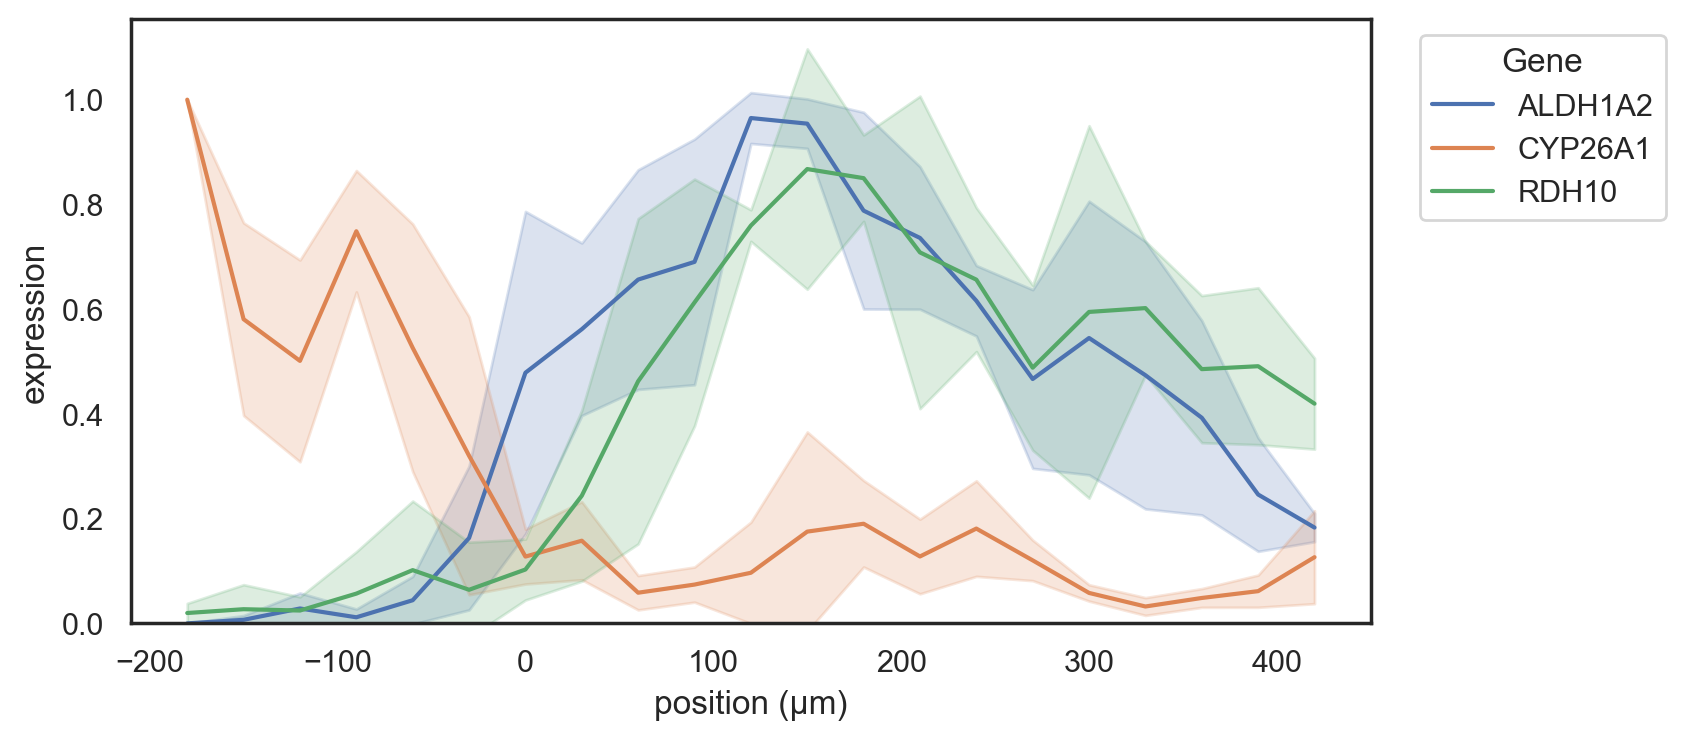

In [39]:
#graph normalized...group of genes

#to make data frame for three tissue
x_position = x_axis + x_axis 
x_position = x_position + x_axis

hoxa = pd.read_csv(f"{inputdir}\\HOXA.csv") 
hoxb = pd.read_csv(f"{inputdir}\\HOXB.csv")
hoxc = pd.read_csv(f"{inputdir}\\HOXC.csv")
hoxd = pd.read_csv(f"{inputdir}\\HOXD.csv")
group1 = pd.read_csv(f"{inputdir}\\group1.csv") 
group2 = pd.read_csv(f"{inputdir}\\group2.csv")
group3 = pd.read_csv(f"{inputdir}\\group3.csv")

genelist = group3
genefamily = "group3"

df_list = []

for i in range(len(genelist)):
    d = {"position (μm)": x_position}
    df = pd.DataFrame(d)

    genename = genelist.loc[i, "Gene"]
    name = []
    for i in range(len(x_position)):
        name.append(genename)

    amp_list1 = density_plotter(df_t1, genename)
    if max(amp_list1) == 0:
        amp_list1_new = amp_list1
    else:
        amp_list1_new = [x/max(amp_list1) for x in amp_list1]
    
    amp_list2 = density_plotter(df_t2, genename)
    if max(amp_list2) == 0:
        amp_list2_new = amp_list2
    else:
        amp_list2_new = [x/max(amp_list2) for x in amp_list2]
    
    amp_list3 = density_plotter(df_t3, genename)
    if max(amp_list3) == 0:
        amp_list3_new = amp_list3
    else:
        amp_list3_new = [x/max(amp_list3) for x in amp_list3]
    
    
    amp_list = amp_list1_new + amp_list2_new + amp_list3_new

    df["expression"] = amp_list
    df["gene"] = name
    
    df_list.append(df)


df_concat = pd.concat(df_list)

gene_legend = genelist["Gene"].tolist()
fig = plt.figure(figsize = (8, 4), dpi = 200)
sns.set(font = "arial")
sns.set_style("white")

sns.lineplot(x = "position (μm)", y = "expression", hue ="gene", data = df_concat, ci = "sd", legend = False)

ax = plt.gca()
ax.axes.set_ylim(0,)
ax.legend(labels = gene_legend, bbox_to_anchor = (1.25,1), title="Gene")
fig.savefig(f"{outputdir4}\\{genefamily}.pdf", bbox_inches='tight')

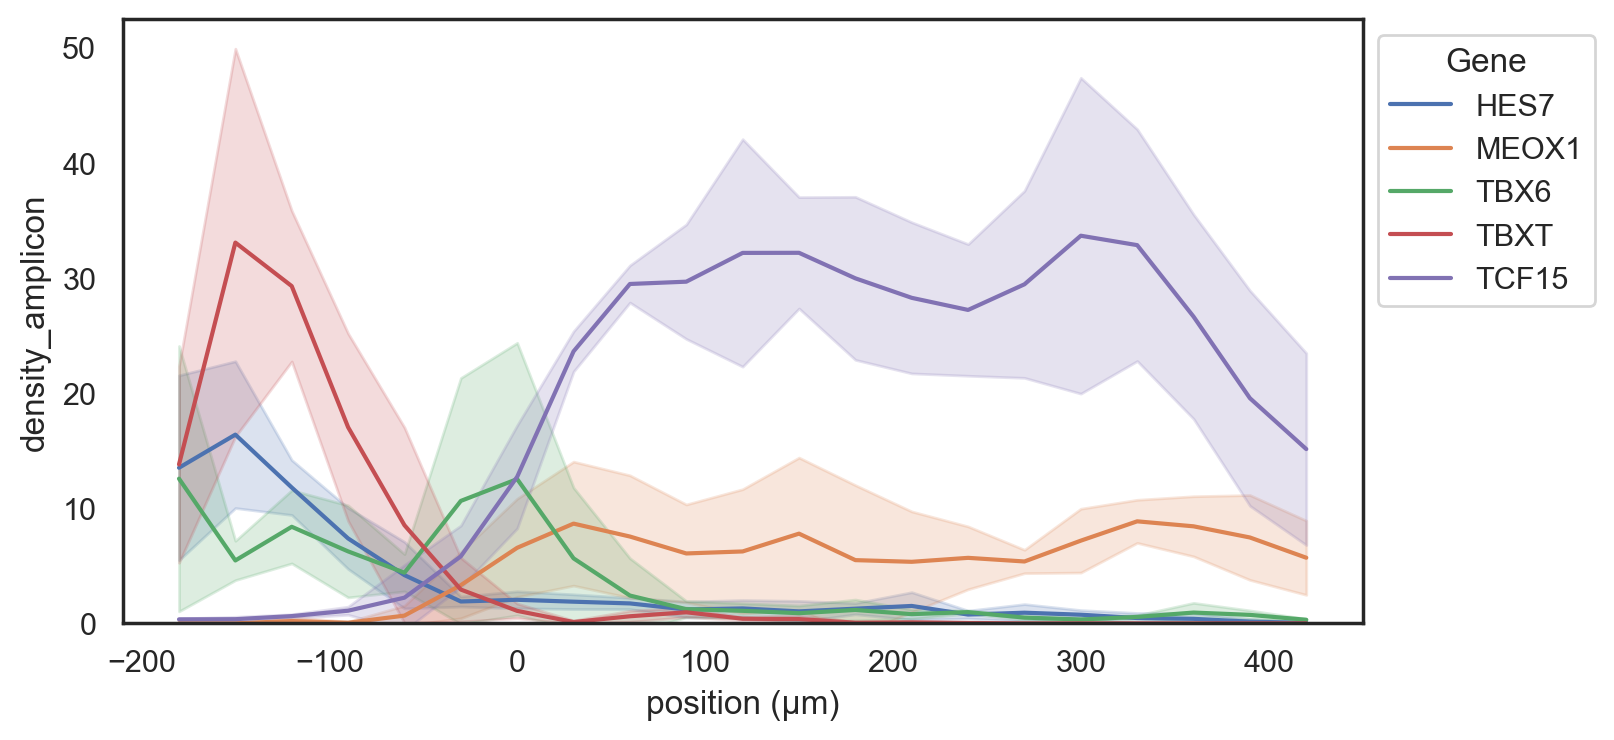

In [7]:
#graph un-normalized
x_position = x_axis + x_axis
x_position = x_position + x_axis

hoxa = pd.read_csv(f"{inputdir}\\HOXA.csv") 
hoxb = pd.read_csv(f"{inputdir}\\HOXB.csv")
hoxc = pd.read_csv(f"{inputdir}\\HOXC.csv")
hoxd = pd.read_csv(f"{inputdir}\\HOXD.csv")
group1 = pd.read_csv(f"{inputdir}\\group1.csv") 
group2 = pd.read_csv(f"{inputdir}\\group2.csv")
group3 = pd.read_csv(f"{inputdir}\\group3.csv")

genelist = group1
genefamily = "group1"

df_list = []

for i in range(len(genelist)):
    d = {"position (μm)": x_position}
    df = pd.DataFrame(d)

    genename = genelist.loc[i, "Gene"]
    name = []
    for i in range(len(x_position)):
        name.append(genename)

    amp_list1 = density_plotter(df_t1, genename)
    
    amp_list2 = density_plotter(df_t2, genename)
    
    amp_list3 = density_plotter(df_t3, genename)
        
    amp_list = amp_list1 + amp_list2 + amp_list3

    df["density_amplicon"] = amp_list
    df["gene"] = name
    
    df_list.append(df)


df_concat = pd.concat(df_list)

gene_legend = genelist["Gene"].tolist()
fig = plt.figure(figsize = (8, 4), dpi = 200)
sns.set(font = "arial")
sns.set_style("white")

sns.lineplot(x = "position (μm)", y = "density_amplicon", hue ="gene", data = df_concat, ci = "sd", legend = False)

ax = plt.gca()
ax.axes.set_ylim(0,)
ax.legend(labels = gene_legend, bbox_to_anchor = (1,1), title="Gene")
fig.savefig(f"{outputdir3}\\{genefamily}.png", bbox_inches='tight')


